In [63]:
import pandas as pd
import numpy as np
from tqdm.autonotebook import tqdm
import matplotlib.pyplot as plt

from CLIP import get_ts_embeddings, find_matches

In [2]:
BTC_MODEL_PATH = "weights/BTC_100000.pt"
BTC_VAL_PATH = "train_val_data/BTC_val.csv"

In [3]:
valid_df = pd.read_csv(BTC_VAL_PATH)
model, ts_embeddings = get_ts_embeddings(valid_df, BTC_MODEL_PATH)

Ignored unknown kwarg option direction


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/815 [00:00<?, ?it/s]

In [66]:
matches = find_matches(model, 
             ts_embeddings,
             query="BTC is a rocket. UP UP UP!",
             n=2000)
matches

tensor([16267,  4672, 10774,  ..., 14920,  5216,  6594])

In [68]:
matches

tensor([16267,  4672, 10774,  ..., 14920,  5216,  6594])

256

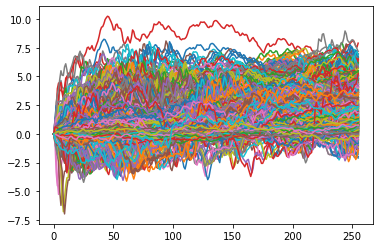

In [67]:
emptycount = 0
for i in ts_embeddings[matches]:
  if len(np.unique(np.array(i))) == 1:
    emptycount+=1
  else:
    plt.plot(i)